In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
file_path = 'processed_datasetNew.csv'
data = pd.read_csv(file_path)

data = data.set_index('Date')
data.index = pd.to_datetime(data.index)

In [20]:
split_date = pd.to_datetime('2008-12-31 23:59')
data = data[data.index >= split_date]

In [21]:
data["Temperature t+24"] = data["Temperature"].shift(periods=-24)
data["Humidity t+24"] = data["Humidity"].shift(periods=-24)
data["Month"] = data.index.month
data["Month_sin"] = np.sin(2 * np.pi * data.index.month / 12)
data["Month_cos"] = np.cos(2 * np.pi * data.index.month / 12)
data["Month t+24"] = data["Month"].shift(periods=-24)
data["Month_sin t+24"] = data["Month_sin"].shift(periods=-24)
data["Month_cos t+24"] = data["Month_cos"].shift(periods=-24)
data["Quarter"] = data.index.quarter
data["Quarter_sin"] = np.sin(2 * np.pi * data.index.quarter / 4)
data["Quarter_cos"] = np.cos(2 * np.pi * data.index.quarter / 4)
data["Quarter t+24"] = data["Quarter"].shift(periods=-24)
data["Quarter_sin t+24"] = data["Quarter_sin"].shift(periods=-24)
data["Quarter_cos t+24"] = data["Quarter_cos"].shift(periods=-24)
data["Year"] = data.index.year
data["Year t+24"] = data["Year"].shift(periods=-24)
data['week_cos'] =  np.cos(2 * np.pi * data.index.isocalendar().week / 53)
data['week_sin'] =  np.sin(2 * np.pi * data.index.isocalendar().week / 53)
data["week_sin t+24"] = data["week_sin"].shift(periods=-24)
data["week_cos t+24"] = data["week_cos"].shift(periods=-24)
data['weekday_cos'] = np.sin(2 * np.pi * (data.index.weekday+1) / 7)
data['weekday_sin'] = np.cos(2 * np.pi * (data.index.weekday+1) / 7)
data["weekday_sin t+24"] = data["weekday_sin"].shift(periods=-24)
data["weekday_cos t+24"] = data["weekday_cos"].shift(periods=-24)

data['weekday'] =  (data.index.weekday+1) / 7

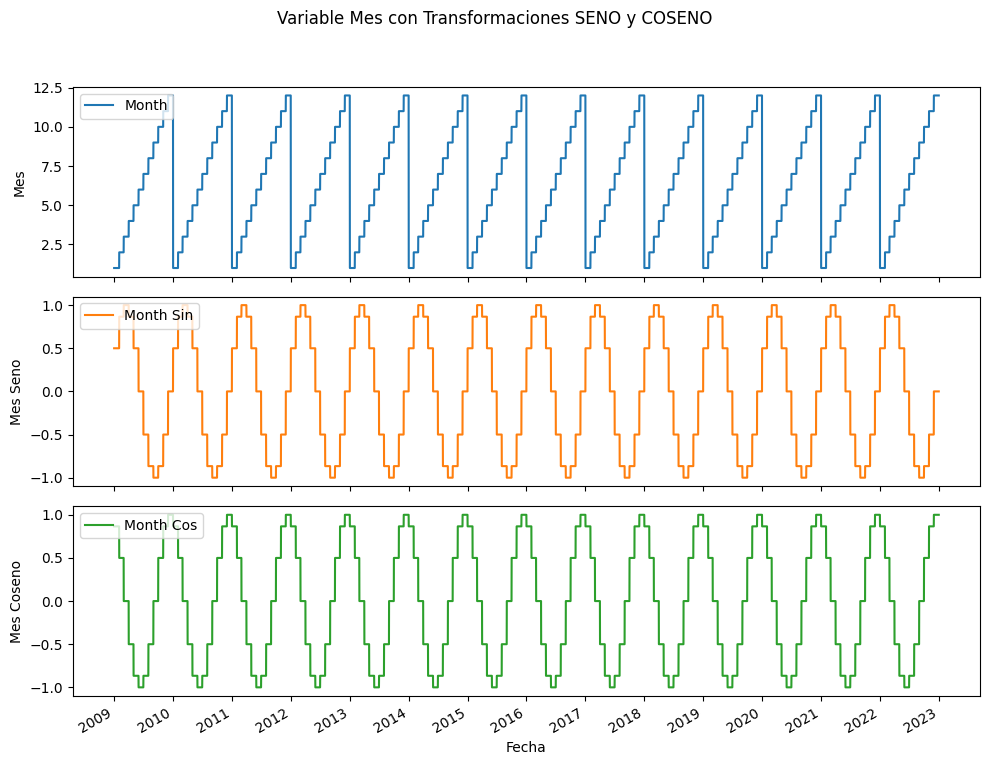

In [22]:
import matplotlib.dates as mdates

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), sharex=True)

# Plot the original month data
axes[0].plot(data.index, data['Month'], label='Month', color='tab:blue')
axes[0].set_ylabel('Mes')
axes[0].legend(loc='upper left')

# Plot the month_sin data
axes[1].plot(data.index, data['Month_sin'], label='Month Sin', color='tab:orange')
axes[1].set_ylabel('Mes Seno')
axes[1].legend(loc='upper left')

# Plot the month_cos data
axes[2].plot(data.index, data['Month_cos'], label='Month Cos', color='tab:green')
axes[2].set_ylabel('Mes Coseno')
axes[2].legend(loc='upper left')

# Set x-axis major locator and formatter
axes[2].xaxis.set_major_locator(mdates.YearLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Set a common x-label
plt.xlabel('Fecha')

# Set a super title for the figure
fig.suptitle('Variable Mes con Transformaciones SENO y COSENO')

plt.savefig('monthly_data_comparison.jpg', format='jpg', dpi=300)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the padding between and around subplots
plt.show()

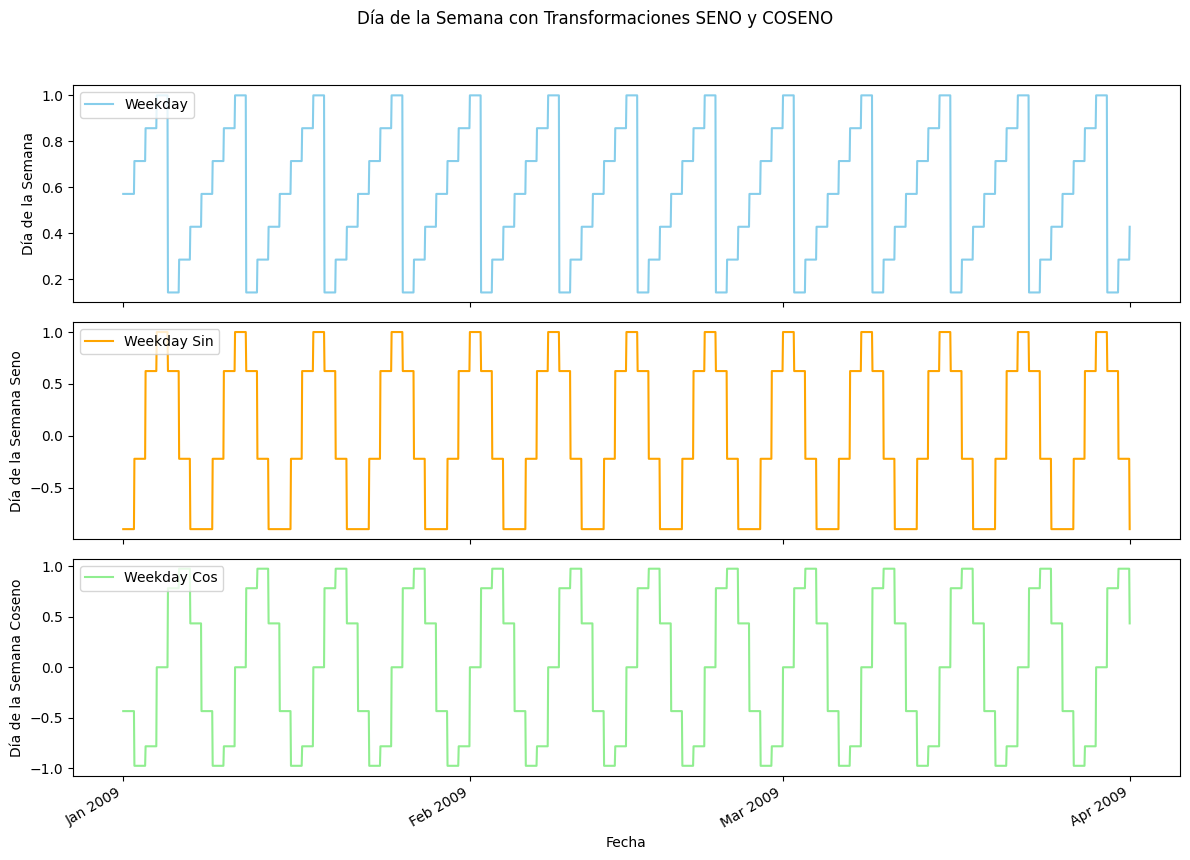

In [23]:
# Filter the DataFrame to only the first six months of training data
first_six_months_end = data.index.min() + pd.DateOffset(months=3)
first_six_months_data = data[:first_six_months_end]

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 9), sharex=True)

# Plot the weekday data
axes[0].plot(first_six_months_data.index, first_six_months_data['weekday'], label='Weekday', color='skyblue')
axes[0].set_ylabel('Día de la Semana')
axes[0].legend(loc='upper left')

# Plot the weekday_sin data
axes[1].plot(first_six_months_data.index, first_six_months_data['weekday_sin'], label='Weekday Sin', color='orange')
axes[1].set_ylabel('Día de la Semana Seno')
axes[1].legend(loc='upper left')

# Plot the weekday_cos data
axes[2].plot(first_six_months_data.index, first_six_months_data['weekday_cos'], label='Weekday Cos', color='lightgreen')
axes[2].set_ylabel('Día de la Semana Coseno')
axes[2].legend(loc='upper left')

# Set x-axis major locator and formatter for date
axes[2].xaxis.set_major_locator(mdates.MonthLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Set a common x-label
plt.xlabel('Fecha')

# Set a super title for the figure
fig.suptitle('Día de la Semana con Transformaciones SENO y COSENO')

# Ensure the plots do not overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a JPEG file
plt.savefig('weekday_data_first_six_months.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()

In [24]:
# Box plot for SIN by month to observe seasonality and outliers
data.boxplot(column='SIN', by='Year')
data.boxplot(column='SIN', by='Quarter')
data.boxplot(column='SIN', by='Month')
data.boxplot(column='SIN', by='weekday')

plt.show()

KeyError: 'Año'

In [ ]:
import seaborn as sns

# Violin plot to show the density and distribution of SIN values on holidays vs. non-holidays
plt.figure(figsize=(10, 6))
sns.violinplot(x='holidays', y='SIN', data=data)
plt.title('Violin Plot del SIN en Feriados vs. No Feriados')
plt.xlabel('Feriados (0 = No Feriado, 1 = Feriadoy)')
plt.ylabel('SIN (MW)')

plt.tight_layout()
# plt.savefig('violin_plot_holidays.png', format='png', dpi=300)

plt.show()

In [ ]:
# Create a 2x2 subplot structure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), gridspec_kw={'hspace': 0.5, 'wspace': 0.3})

# Box plot for SIN by Year
data.boxplot(column='SIN', by='Year', ax=axes[0, 0])
axes[0, 0].set_title('SIN by Year')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('SIN')

# Box plot for SIN by Quarter
data.boxplot(column='SIN', by='Quarter', ax=axes[0, 1])
axes[0, 1].set_title('SIN by Quarter')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('SIN')

# Box plot for SIN by Month
data.boxplot(column='SIN', by='Month', ax=axes[1, 0])
axes[1, 0].set_title('SIN by Month')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('SIN')

# Box plot for SIN by weekday
# Assuming 'weekday' column has values 0 to 6 representing weekdays
data.boxplot(column='SIN', by='weekday', ax=axes[1, 1])
axes[1, 1].set_title('SIN by Weekday')
axes[1, 1].set_xlabel('')
axes[1, 1].set_xticklabels(range(7))  # Set x-tick labels to show 0 to 6
axes[1, 1].set_ylabel('SIN')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Save the figure as a JPEG file
plt.savefig('box-plot.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame with features and target variable
# Compute the correlation matrix
corr_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Add titles and labels as needed
plt.title('Feature Correlation with SIN')
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame and 'SIN' is your target variable column
# Create lagged features for SIN
for lag in [1, 2, 24, 23, 25, 3, 168, 48, 22, 26, 169, 167, 144, 4, 72]:
    data[f'SIN_T-{lag}'] = data['SIN'].shift(lag)

# Calculate the correlation of SIN with its lagged values
correlation = data.corr()['SIN'].drop('SIN')  # Remove the correlation of SIN with itself

# Select only the lagged features
correlation = correlation.filter(like='SIN_T').sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 7))
correlation.plot(kind='bar', color='teal')
plt.title('Correlation of SIN with its lagged values')
plt.xlabel('SIN horas anteriores')
plt.ylabel('Coefficients')
plt.show()

In [ ]:
# Set the window size for rolling calculations, e.g., 24 hours for a daily rolling window
window_size = 24  # Adjust the window size to suit your specific data

# Calculate the rolling mean and standard deviation
data['rolling_mean'] = data['SIN'].rolling(window=window_size).mean()
data['rolling_std'] = data['SIN'].rolling(window=window_size).std()

# Plotting
plt.figure(figsize=(14, 7))

# Plot the rolling standard deviation as a filled area
plt.fill_between(data.index, data['rolling_mean'] - data['rolling_std'], data['rolling_mean'] + data['rolling_std'], color='orange', alpha=0.5, label='Rolling Std')

# Plot the rolling mean
plt.fill_between(data.index, 0, data['rolling_mean'], color='blue', alpha=0.3, label='Rolling Mean')

# Plot the original SIN data on top as a line
plt.plot(data.index, data['SIN'], label='Original', color='blue', alpha=0.7)

# Add titles and labels as needed
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Años')
plt.ylabel('Consumo de potencia (MW)')
plt.legend()

# Show the plot
plt.show()

In [ ]:
features_options = [
    ["Temperature", "Humidity"],
    ["Temperature", "Humidity", "Year", "Month"],
    ["Temperature", "Humidity", "Year", "Month", "Month_cos", "Month_sin"],
    ["Temperature", "Humidity", "Year", "Month", "Month_cos", "Month_sin", "weekday_cos", "weekday_sin"],
    ["Temperature", "Humidity", "Temperature t+24", "Humidity t+24"],
    ["Temperature", "Humidity", "Year", "Month", "Temperature t+24", "Humidity t+24", "Year t+24", "Month t+24"],
    ["Temperature", "Humidity", "Year", "Month", "Month_cos", "Month_sin", "Temperature t+24", "Humidity t+24", "Year t+24", 
    "Month t+24", "Month_cos t+24", "Month_sin t+24"],
    ["Temperature", "Humidity", "Year", "Month", "Month_cos", "Month_sin", "weekday_cos", "weekday_cos", "Temperature t+24", "Humidity t+24",
    "Year t+24", "Month t+24", "Month_cos t+24", "Month_sin t+24", "weekday_cos t+24", "weekday_sin t+24"],
    ["Temperature", "Humidity", "Year", "weekday_cos", "weekday_sin", "Month_cos", "Month_sin"],
    ["Temperature", "Humidity", "Year", "weekday_cos", "weekday_sin", "Temperature t+24", "Humidity t+24", "Year t+24", "weekday_cos t+24", "weekday_sin t+24"]
]

In [ ]:
data_sin = data[['SIN']]
data_cov = data[features_options[8]]

In [ ]:
from darts import TimeSeries
series = TimeSeries.from_dataframe(data_sin, value_cols=["SIN"])
covariates = TimeSeries.from_dataframe(data_cov, value_cols=features_options[8])
series = series.astype(np.float32)
covariates = covariates.astype(np.float32)

In [ ]:
# Add holiday binary value
covariates = covariates.add_holidays('PY')

In [ ]:
covariates['holidays']

In [ ]:
import seaborn as sns

data = covariates.pd_dataframe()

 # Ensure the data is sorted by the index
data.sort_index(inplace=True)

# Filter for the desired date range
data_filtered = data['2009-01-01':'2014-12-31']

# Create a pivot table with the year as the rows and the day of the year as the columns
pivot_table = data_filtered.pivot_table(index=data_filtered.index.year,
                                        columns=data_filtered.index.dayofyear,
                                        values='holidays',
                                        aggfunc='max')

# Replace NaN values with 0
pivot_table = pivot_table.fillna(0)

# Plotting the heatmap
plt.figure(figsize=(20, 5))
ax = sns.heatmap(pivot_table, cmap='Reds', cbar=False)

# Set the x-ticks to be more readable
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
date_format = mdates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(lambda x, pos: (mdates.num2date(x) + pd.DateOffset(years=2008)).strftime('%b %d') if x > 0 else '')

# Rotate the tick labels for the x-axis
plt.xticks(rotation=90)

# Set labels and title
plt.title('Holiday Occurrences from 2009 to 2014')
plt.xlabel('Date of the Year')
plt.ylabel('Year')

# Save the figure as a JPEG file
plt.savefig('holiday_heatmap_full_year_2009_to_2014.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()